In [1]:
import numpy as np
import matplotlib.pyplot as plt
from empca import empca,classic_pca
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
seed = np.random.seed(1)
def makemydata(N,D):
    """
    Make a data set drawn from a Gaussian of arbitrary dimension with an arbitrary number of data points, 
    then add Gaussian noise to each point.
    """
    olddata = np.zeros((N,D))
    for d in range(D):
        center = 2*np.random.random()
        olddata[:,d] = np.random.normal(loc=center,size=N)
    noise = 0.1*np.random.randn(N,D)
    data = noise + olddata
    return data,noise


# Signal Test #

       iter        R2             rchi2
EMPCA  1/10       1.00000000     -0.00000000
EMPCA  2/10       1.00000000     -0.00000000
EMPCA  3/10       1.00000000     -0.00000000
EMPCA  4/10       1.00000000     -0.00000000
EMPCA  5/10       1.00000000     -0.00000000
EMPCA  6/10       1.00000000     -0.00000000
EMPCA  7/10       1.00000000     -0.00000000
EMPCA  8/10       1.00000000     -0.00000000
EMPCA  9/10       1.00000000     -0.00000000
EMPCA 10/10       1.00000000     -0.00000000
R2: 1.0
1.0 0.732140081346 -0.365858836962
(400, 2)


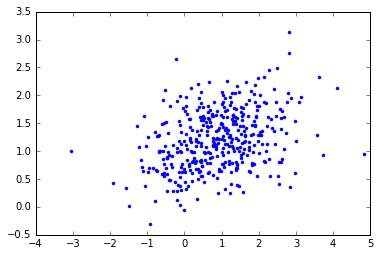

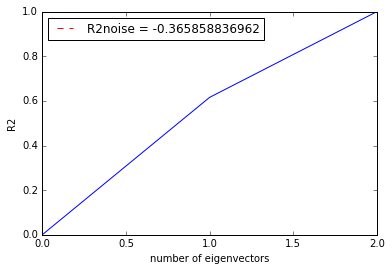

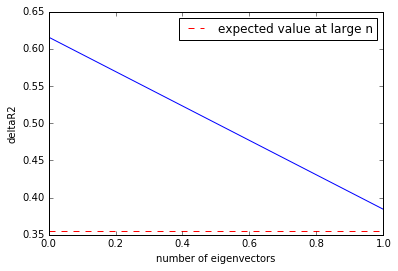

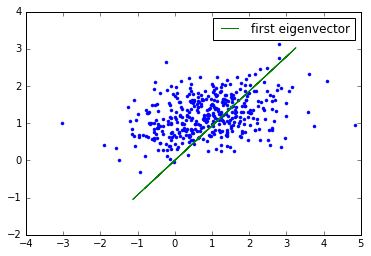

In [3]:
# Run a test sample with actual signal in the data

N = 400
D = 2
data = np.zeros((N,D))
data[:,0] = np.random.normal(loc=2*np.random.random(),size=N)
data[:,1] = 0.2*data[:,0] + 1
noise = 0.5*np.random.randn(N,D)
data += noise

Sd = np.sum(noise[:,0]**2)/N

plt.plot(data[:,0],data[:,1],'.')

nvec=2


e = empca(data,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
plt.figure()
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

mx = np.zeros(e.data.shape)
for i in range(nvec):
    mx += e._model_vec(i)

d = mx - e.data

plt.figure()
plt.plot(data[:,0],data[:,1],'.')
plt.plot(e.coeff[:,0]*e.eigvec[0][0],e.coeff[:,0]*e.eigvec[0][1],label='first eigenvector')
plt.legend(loc='best')
print e.coeff.shape

# N > D Case #

In [4]:
N = 400
D = 3
data,noise = makemydata(N,D)

In [5]:
Vdata = np.var(data)
Vdata

1.2483222312996869

In [6]:
Sd = np.sum(noise[:,0]**2)/N
Sd

0.0092141177846171013

In [8]:
nvec = 50
e = empca(data,weights = 1./noise**2,nvec=nvec,niter=10)

vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)

Vdata = e._unmasked_data_var
                                                
Vnoise = np.mean(1./(e.weights[e.weights!=0]))

R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata, R2noise

plt.figure()
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r',label = 'R2noise = {0}'.format(R2noise))
plt.ylim(0,1)
plt.ylabel('R2')
plt.legend(loc='best')
plt.xlabel('number of eigenvectors')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
plt.figure()
plt.plot(deltR2)
plt.axhline(Sd/Vdata,ls='--',color='r',label = 'expected value at large n')
plt.legend(loc = 'best')
plt.ylabel('deltaR2')
plt.xlabel('number of eigenvectors')

ValueError: On entry to DLASCL parameter number 4 had an illegal value

# N < D Case #

In [9]:
N = 50
D = 400
data,noise = makemydata(N,D)

       iter        R2             rchi2
EMPCA  1/10      -0.17657872  -9225.26956703
EMPCA  2/10      -0.02609929  -7462.70571585
EMPCA  3/10       0.02509730  -7035.38650849
EMPCA  4/10       0.06574965  -7768.19923919
EMPCA  5/10       0.08882703  -9086.56271272
EMPCA  6/10       0.06396520  -9848.53424009
EMPCA  7/10       0.07272724  -8807.78142584
EMPCA  8/10       0.06833153  -8820.09137675
EMPCA  9/10       0.08958356  -8377.04990188
EMPCA 10/10       0.11038670  -7036.24732042
R2: 0.110386698827
0.00997612633754 1.34029518646


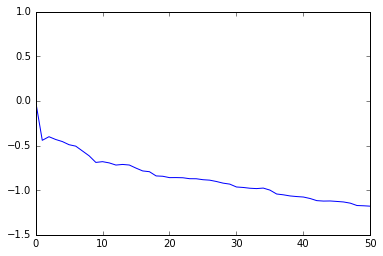

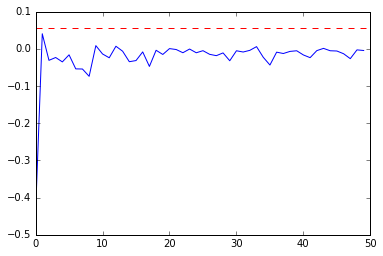

In [10]:
e = empca(data,weights=1/noise**2,nvec=50,niter=10)
vecs = len(e.eigvec)
R2Array = np.zeros(vecs+1)
for vec in range(vecs+1):
    R2Array[vec] = e.R2(vec)
Vdata = e._unmasked_data_var
# Calculate data noise                                                  
Vnoise = np.mean(1./(e.weights[e.weights!=0]))
R2noise = 1.-(Vnoise/Vdata)
print Vnoise, Vdata
plt.plot(R2Array)
plt.axhline(R2noise,ls='--',color='r')
#plt.ylim(0,1)
#plt.savefig('confusingR2.png')
deltR2 = (R2Array-np.roll(R2Array,1))[1:]
plt.figure()
plt.plot(deltR2)
plt.axhline((D/N)*Sd/Vdata,ls='--',color='r')
#plt.ylim(-1.5*Sd/Vdata,1.5*Sd/Vdata)

In [11]:
e.R2()

-1.1795163276505183